
<h1 style="color:#2bf0b5;"> <b>Neuroscience</b> HW2-2 - Lachin Naghashyar</h1>

---

<h2 style="color:#f06ff2;"> <b>Synapses On Integrate-and-Fire Neurons</b></h2>



**Q1:** <h3 style="color:#f00ff2;"> <b> Describe the parameters</b></h3>

$\tau_m$: it's a time constant which shows the speed of convergence of the voltage to its final value. Also it is proportional to membrane
resistance and membrane capacitance $\tau_m = r_m c_m$.

$E_L$ : equilibrium potential which shows the amount of voltage if we didn't have an input current in the system for a long time.

$I_e$: input (inward) current

$R_m$: membrane resistance

$C_m$: membrane capacitance 

membrane resistance and capacitance, together, determine how slowly (or quickly) the membrane voltage responds to changes in input current

$r_m$: we have $r_m = A R_m$ where A is the area

$c_m$: we have $c_m = \frac{C_m}{A}$ (like we are looking at a small patch on its surface)

$V_{threshold}$: The potential threshold where neuron fires spike when its potential reaches that value

$g(t)$: synaptic conductance (which corresponds to ion channels opening) and it depends on the maximum conductane, release of neurotransmitters and probability of post-synaptic channels opening $(P_s(t))$.

$K(t)$: note that $P_s(t) = K(t)$ and in this example, we are using an Alpha function represented as $\alpha(t) = \frac{t}{\tau_{peak}} e^{1-\frac{t}{\tau_{peak}}}$ where $\tau_{peak}$ is the time constant it decays with

$E_s$: at equilibrium and for a constant leakage current, membrane potential  ($V$) approaches $E_s$. Its value is different for excitatory and inhibitory synapes. 

$\rho{(\tau)}$: Is the input spike train and can be written as $\rho{(\tau)} = \Sigma \sigma(t-t_i)$



Q2: <h3 style="color:#f00ff2;"> <b> Perform simulations on a single neuron</b></h3>

In [119]:
from matplotlib import pyplot as plt
import numpy as np
# some constants here:
dt = 0.01  # Simulation time step
Duration = 200  # Simulation length
T = int(np.ceil(Duration / dt))
t = np.arange(1, T + 1) * dt  # Simulation time points in ms

V_rest = -80
E_L = -70
tau_m = 20
IR = 25
r_m = 100
V_th = -54

E_s_exc = 0
E_s_inh = -80
spike_val = 25
tau_peak = 10


def simulate(E_s, p, rho_val, spiking_length, v_initial):
    V = v_initial * np.ones(T)
    for i in range(1, len(t)):
        gt = g(i, p, rho_val, spiking_length)
        V[i] = ((1 / tau_m) * (-((V[i - 1] - E_L) + gt * (V[i - 1] - E_s) * r_m) + IR)) * dt + V[i - 1]
        if V[i] > V_th:
            V[i] = V_rest
            V[i - 1] = spike_val
    return V


def g(i, p, val, spiking_length):
    rho = np.zeros(T)
    kt = np.arange(0, Duration, dt)
    # calculate the spike train with a period of p
    for j in range(T):
        if j % p == 0:
            rho[j: j + spiking_length] = val
    return np.sum(K(kt) * np.roll(rho, i)) / 1000


def K(t):
    return (t / tau_peak) * np.exp(1 - (t / tau_peak))


def plot_simulation(E_s, p, rho_val=0.01, spiking_length=50, v_initial=V_rest):
    V = simulate(E_s, p, rho_val, spiking_length, v_initial)
    plt.plot(t, V)
    plt.show()

- Simulation for a single **excitatory** neuron (time interval is chosen as 200 ms, longer intervals take so much time than necessary):

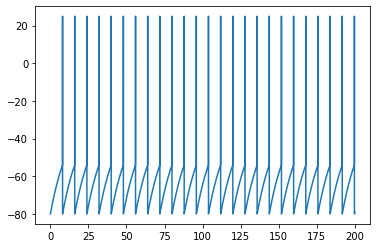

In [2]:
plot_simulation(E_s_exc, p = 200)

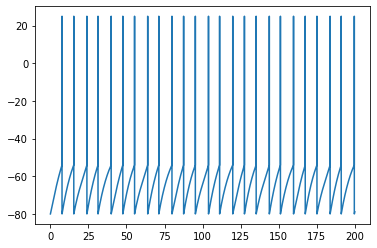

In [3]:
plot_simulation(E_s_exc, p = 2000, rho_val=0.1)

- Simulation for a single **inhibitory** neuron:

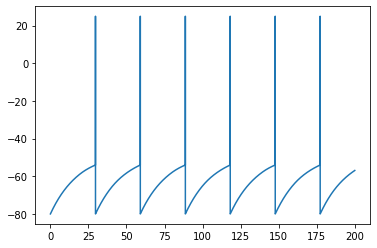

In [4]:
plot_simulation(E_s_inh, p = 2000)

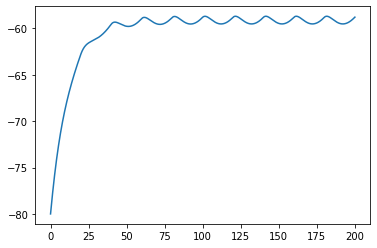

In [5]:
plot_simulation(E_s_inh, p = 2000, rho_val=0.1)

As we can see, the spiking frequency in inhibitory neuron is much less than the excitatory one (or even without spike, which was also predictable in the case of an inhibitory one)

- We can also check the **effect of period value** in rho on the results:

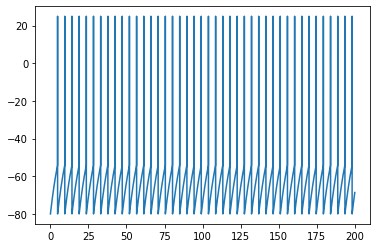

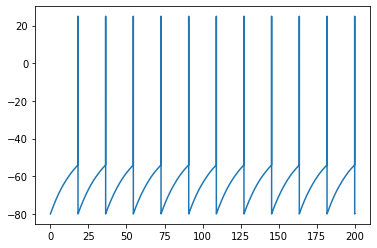

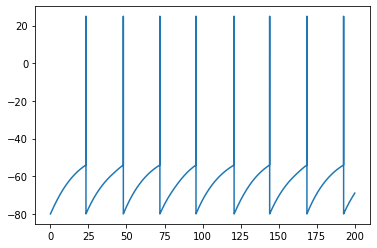

In [6]:
# check the periods of 100, 1000 and 4000 on excitatory neuron:
plot_simulation(E_s_exc, p = 100)
plot_simulation(E_s_exc, p = 1000)
plot_simulation(E_s_exc, p = 4000)

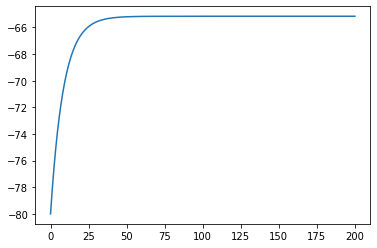

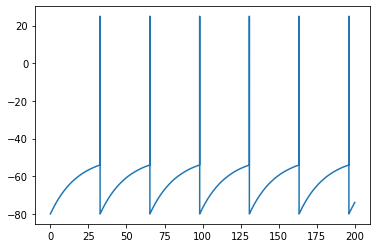

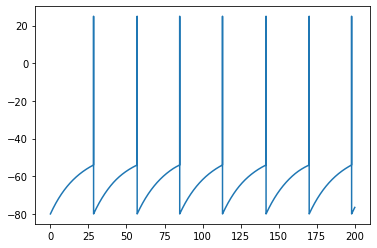

In [7]:
# check the periods of 100, 1000 and 4000 on inhibitory neuron:
plot_simulation(E_s_inh, p = 100)
plot_simulation(E_s_inh, p = 1000)
plot_simulation(E_s_inh, p = 4000)

As expected, by increasing the period, spiking period increases too.(in other words, by decreasing the spiking frequency of spike train (the neighbors), the frequency in the neuron's spiking decreases too)

- Check the effect of initial voltage value

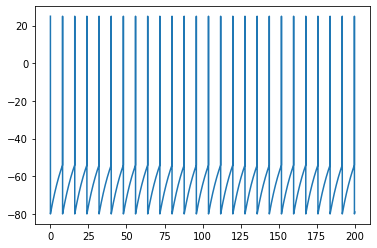

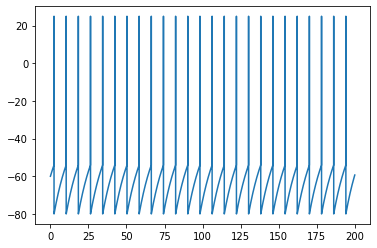

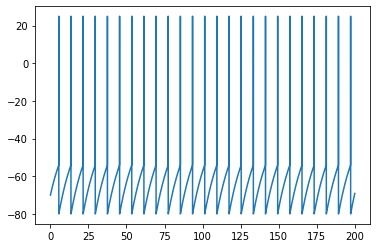

In [8]:
# v_initial = -20, -50, -70
plot_simulation(E_s_exc, p = 200, v_initial = 20)
plot_simulation(E_s_exc, p = 200, v_initial = -60)
plot_simulation(E_s_exc, p = 200, v_initial = -70)

the initial value of V, only shifts the plot horizontally (changes the starting point for voltage in the plot) and doesn't affect it in other ways than that.

**Q3:** <h3 style="color:#f00ff2;"> <b> Perform simulations on two neurons (excitatory/ inhibitory)</b></h3>

- Assume that the initial voltage for these two neurons is set as $-80 mV$ and $-60 mV$.

We need to make some changes to the simulation code so that the spikes of one neuron effects the other one. I also used a separate variable for spiking trains (rho1, rho2) here, so that I can apply their effects on each other.

In [120]:
def simulate2(E_s, rho_val, spiking_length, v_initial_1, v_initial_2):
    V1, V2 = v_initial_1 * np.ones(T), v_initial_2 * np.ones(T)
    rho1, rho2 = np.zeros(T), np.zeros(T)
    for i in range(1, len(t)):

        gt = g2(i, rho1)
        V1[i] = ((1 / tau_m) * (-((V1[i - 1] - E_L) + gt * (V1[i - 1] - E_s) * r_m) + IR)) * dt + V1[i - 1]
        if V1[i] > V_th:
            V1[i] = V_rest
            V1[i - 1] = spike_val
            update_rho(rho2, i, rho_val, spiking_length)

        gt = g2(i, rho2)
        V2[i] = ((1 / tau_m) * (-((V2[i - 1] - E_L) + gt * (V2[i - 1] - E_s) * r_m) + IR)) * dt + V2[i - 1]
        if V2[i] > V_th:
            V2[i] = V_rest
            V2[i - 1] = spike_val
            update_rho(rho1, i, rho_val, spiking_length)
    return V1, V2


def update_rho(rho, i, val, spiking_length):
    l = i + spiking_length
    if l > T:
        l = T
    rho[i: l] = val


def g2(i, rho):
    return np.sum(np.roll(np.flipud(K(np.arange(0, Duration, dt))), i) * rho) / 1000


def plot_simulation2(E_s, rho_val=0.01, spiking_length=50, v_initial_1=-80, v_initial_2=-60):
    V1, V2 = simulate2(E_s, rho_val, spiking_length, v_initial_1, v_initial_2)
    plt.plot(t, V1)
    plt.plot(t, V2)
    plt.show()



So we can test the simulation for two excitatory and two inhibitory neurons:

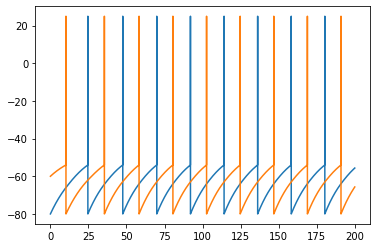

In [10]:
plot_simulation2(E_s_exc)

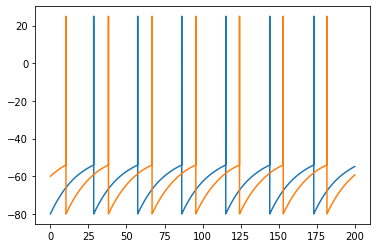

In [121]:
plot_simulation2(E_s_inh)

As expected, excitatory synapses produce an alternating, out-of-phase pattern of firing (they spike in turns after each other keeping the same pattern over time). Inhibitory synapses produce synchronous firing meaning after some time, they spike at the same as each other.

- The result for the inhibitory neurons is somehow different in q2.py and q2.ipnyb. I attached the correct result retrieved by q2.py in resQ2.

**Q4:** <h3 style="color:#f00ff2;"> <b> Instability in the results </b></h3>


This can happen if we increase g(t) or similarly, increase the spike value in rho.
Consider the cases below:

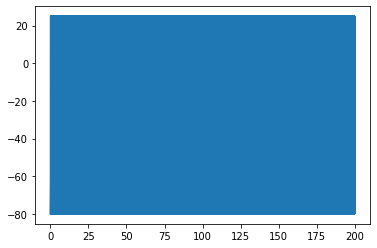

In [12]:
plot_simulation(E_s_exc, p = 2000, rho_val=10)

As you can see, the frequency of spikes goes to infinity (g(t) increases and makes dv increase too, this way we will have spikes generated quickly after one another) and the system becomes unstable. This won't happen in out brain because g or the membrane conductance can't become too large.